<a href="https://colab.research.google.com/github/utkarshg1/test_12/blob/main/Regression_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression using Tensorflow Keras

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

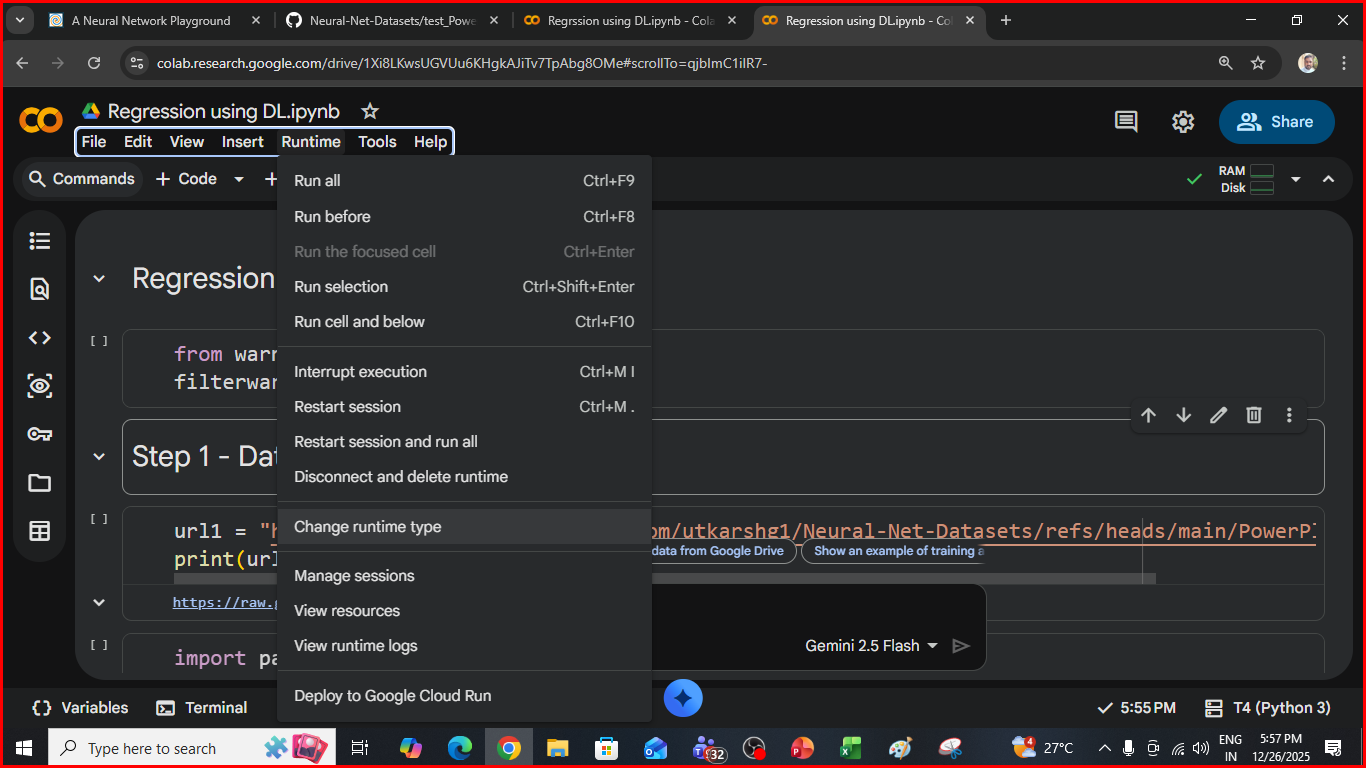

![image.png](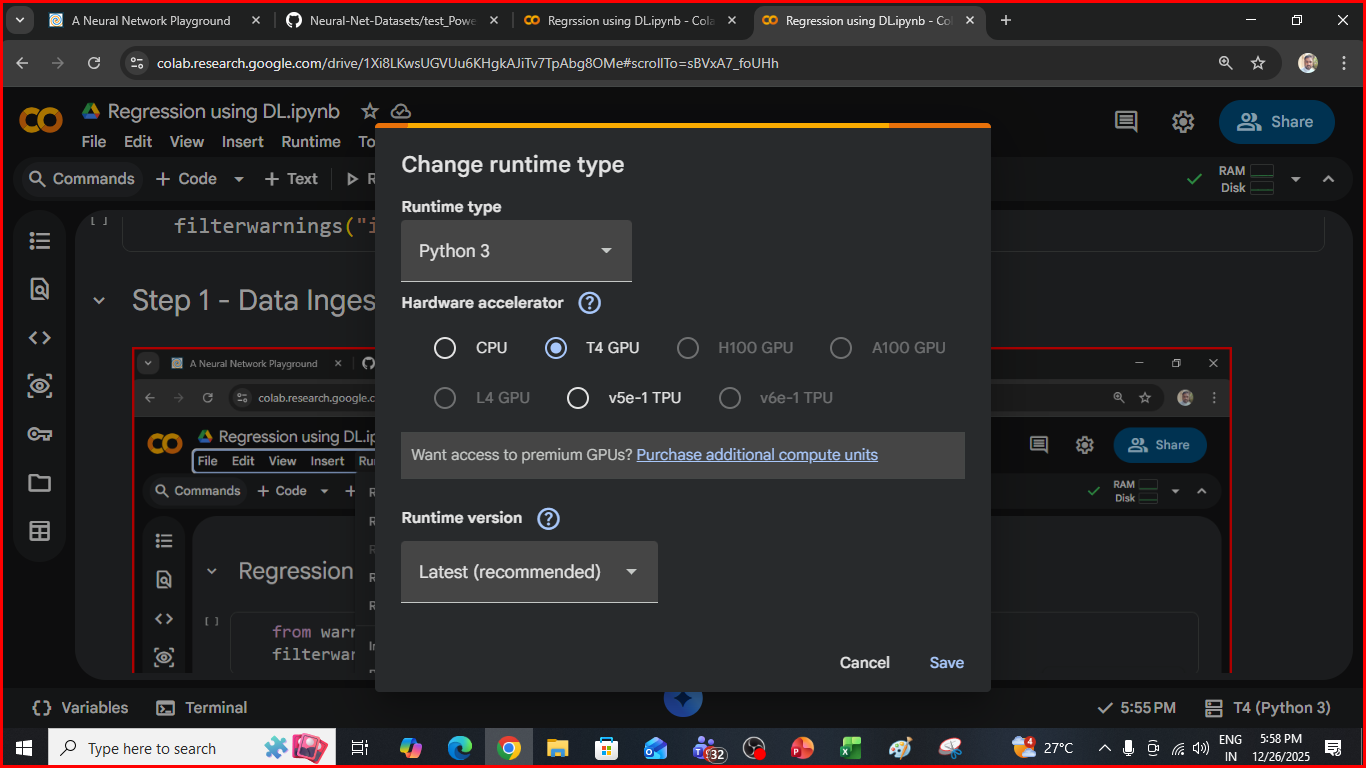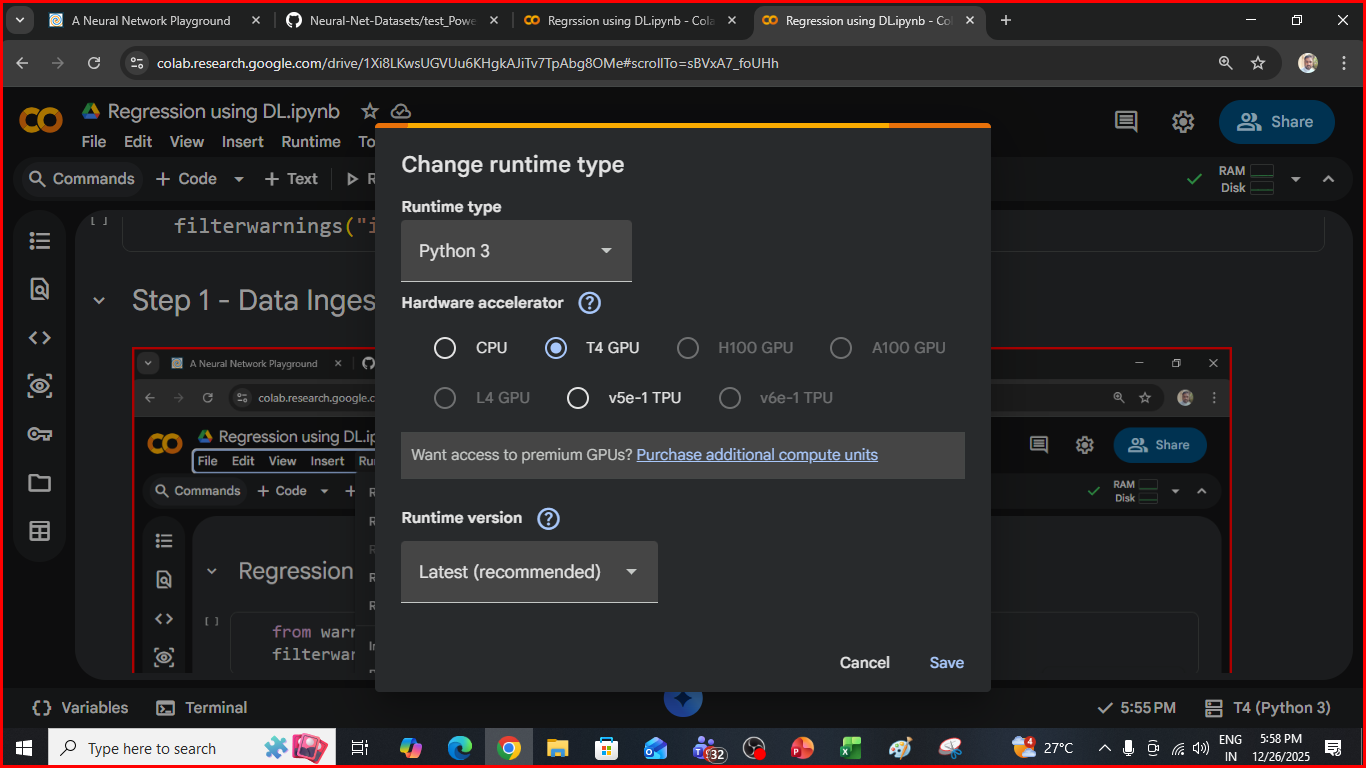)

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Step 2 - Perform basic data quality checks

In [4]:
df.shape

(9568, 5)

In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop = True)
df.shape

(9527, 5)

In [7]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# AT - Atmospheric Temperature
# V - Vacuum Pressure
# AP - Atmospheric Pressure
# RH - Relative Humidity
# PE - Power Output

# Step 3 - Seperate X and Y(PE)

In [9]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


# Step 4 - Apply train test split

In [11]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
xtrain.shape

(7621, 4)

In [13]:
xtest.shape

(1906, 4)

# Step 5 - Apply preprocessing on X

In [14]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform = "pandas")

In [17]:
num_pipe.fit(xtrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [18]:
xtrain_pre = num_pipe.transform(xtrain)
xtest_pre = num_pipe.transform(xtest)

In [19]:
xtrain_pre.head()

,AT,V,AP,RH
5695,-0.154993,0.323693,0.084610,1.818417
7300,-1.504241,-1.151828,0.319064,0.907637
9066,-0.889599,-0.953518,0.288703,0.987193
6424,1.401831,1.221597,-0.485502,-1.086753
6773,-0.828943,-0.940927,0.793033,1.506365


In [20]:
xtest_pre.head()

,AT,V,AP,RH
1087,1.831812,1.118507,-0.131290,-1.419379
6308,-1.508285,-1.243114,0.039069,-0.470879
8021,-1.471891,-1.416242,0.394967,-1.086753
9483,0.149632,0.647127,0.727251,-0.005201
4459,-0.037726,1.126376,-0.367431,1.586607


# Step 6 - Build the neural network
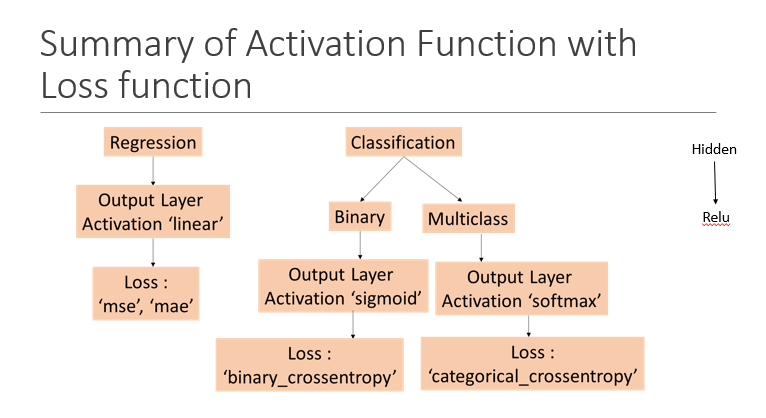

In [24]:
xtrain_pre.shape

(7621, 4)

In [25]:
xtrain_pre.shape[1]

4

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [26]:
model = Sequential(
    [
        Input(shape = (xtrain_pre.shape[1], )),
        Dense(8, activation = "relu"),
        Dense(4, activation = "relu"),
        Dense(1, activation = "linear")
    ]
)

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

In [29]:
hist = model.fit(xtrain_pre, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 206931.6250 - mae: 454.5804 - val_loss: 204157.5312 - val_mae: 451.5170
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 203637.9219 - mae: 450.9567 - val_loss: 193643.1562 - val_mae: 439.8066
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 188362.7031 - mae: 433.7238 - val_loss: 163353.5938 - val_mae: 403.6985
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 152756.4531 - mae: 389.6984 - val_loss: 116043.4453 - val_mae: 336.8586
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103465.7656 - mae: 315.2932 - val_loss: 70658.7578 - val_mae: 250.0967
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 61556.0625 - mae: 229.6816 - val_loss: 42282.4141 - val_mae: 182.0830
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37666.0859 - mae: 170.4486 - val_loss: 28335.3027 - val_mae: 142.5503
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26010.8398 - mae: 136

# Plot the learning curve

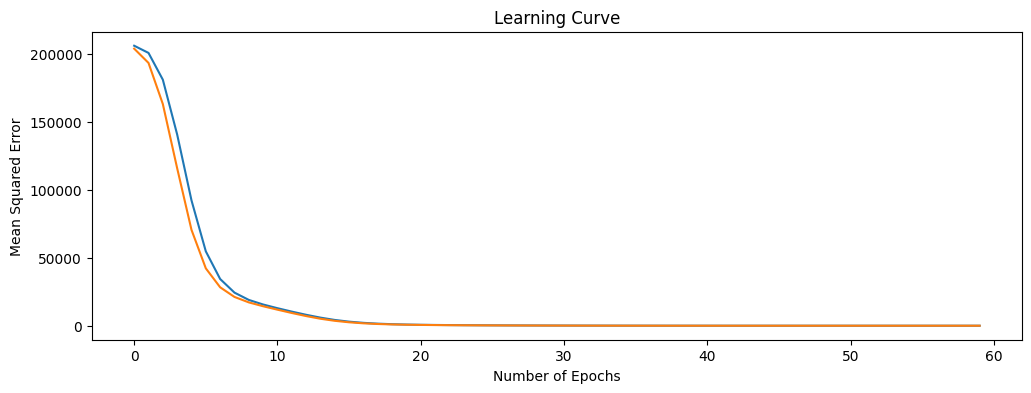

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.title("Learning Curve")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.show()

# Model evaluation

In [31]:
train_mse, train_mae = model.evaluate(xtrain_pre, ytrain)
print(f"Train MSE : {train_mse:.4f}")
print(f"Train MAE : {train_mae:.4f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20.8563 - mae: 3.6463
Train MSE : 20.9869
Train MAE : 3.6339


In [32]:
test_mse, test_mae = model.evaluate(xtest_pre, ytest)
print(f"Test MSE : {test_mse:.4f}")
print(f"Test MAE : {test_mae:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 19.7539 - mae: 3.5712
Test MSE : 21.0604
Test MAE : 3.6706


# Evaluate model in detail

In [33]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [34]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.4f}")
  print(f"MAE : {mae:.4f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [35]:
evaluate_model(model, xtrain_pre, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RMSE : 4.5811
MAE : 3.6339
MAPE : 0.80%
R2 : 92.70%


In [36]:
evaluate_model(model, xtest_pre, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE : 4.5892
MAE : 3.6706
MAPE : 0.81%
R2 : 93.02%


# Out of Sample prediction

In [37]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [38]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [39]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380123,0.355958,-0.596825,0.810249
1,1.241431,0.046688,-1.030313,-1.836363
2,1.107989,1.488371,-2.015358,0.857571
3,0.811451,0.626666,-0.318516,0.048294
4,-1.012258,-1.061330,2.112049,-0.164999


In [41]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[445.6967 ],
       [439.70065],
       [430.89218],
       [440.428  ],
       [473.75317]], dtype=float32)

In [42]:
xnew["PE_pred"] = preds.round(2)

In [43]:
xnew.head()

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.700012
1,28.88,54.89,1007.16,46.60,439.700012
2,27.89,73.21,1001.32,85.88,430.890015
3,25.69,62.26,1011.38,74.08,440.429993
4,12.16,40.81,1025.79,70.97,473.750000


In [44]:
xnew.to_csv("PowerPlant_results.csv")